In [ ]:
! pip install visualkeras numpy pandas seaborn tensorflow matplotlib 

In [62]:
import os
import cv2
import visualkeras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
from warnings import filterwarnings 
filterwarnings('ignore')

## 1.Dataset checking

In [17]:
data_dir = (r'brain_tumor/Training/') #Path for our train directory 
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'] #Classes in our dataset
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))   

## 2. Visualize samples from the dataset

Image dataset size : (512, 512, 3)


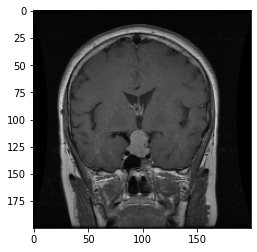

In [18]:
print("Image dataset size :" ,img_array.shape)
new_size = 200
new_array = cv2.resize(img_array,(200,200))    
plt.imshow(new_array,cmap = "gray")

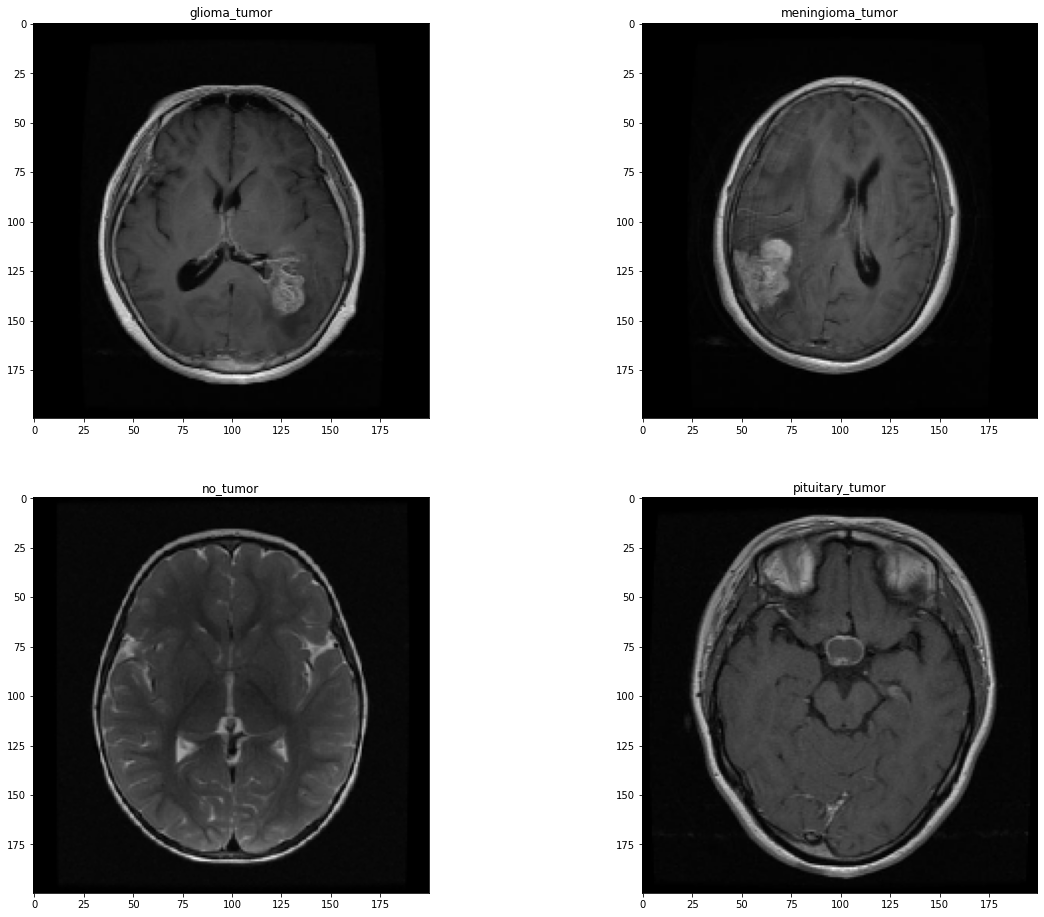

In [19]:
plt.figure(figsize=(20, 16))

fileNames = ['glioma_tumor/gg (10).jpg', 'meningioma_tumor/m (108).jpg', 'no_tumor/image (16).jpg', 'pituitary_tumor/p (12).jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + fileNames[i])
    img = cv2.resize(img, (new_size, new_size))
    plt.imshow(img)
    plt.title(categories[i])

## 3.Data preparation and features visualization

In [20]:
x_train=[]
y_train=[]

for i in categories:
    train_path = os.path.join(data_dir,i)
    for j in os.listdir(train_path):
        img = cv2.imread(os.path.join(train_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_train.append(img)
        y_train.append(i)

In [21]:
x_train=np.array(x_train)
x_train=x_train/255.0
x_train = x_train.reshape(-1,new_size,new_size,1)
y_train = np.array(y_train)

print('DataSet X shape (Data features):',x_train.shape)
print('DataSet Y shape (Gold label):',y_train.shape)

DataSet X shape (Data features): (2870, 200, 200, 1)
DataSet Y shape (Gold label): (2870,)


<AxesSubplot:ylabel='count'>

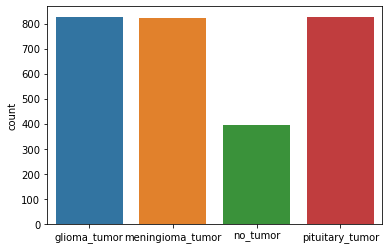

In [22]:
#View the number of data samples in each categorie
sns.countplot(y_train)

In [23]:
#Splitting into training and validation sets at 20% 
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [24]:
#Transform our multiclass label to one hot encode type : assign an integer for each category

y_train_new = []
for i in y_train:
    y_train_new.append(categories.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_val_new = []
for i in y_val:
    y_val_new.append(categories.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [25]:
print('New shapes after spliting and encoding :')
print("TrainSet shape :",X_train.shape, y_train.shape)
print("ValidationSet shape :",X_val.shape, y_val.shape)

New shapes after spliting and encoding :
TrainSet shape : (2296, 200, 200, 1) (2296, 4)
ValidationSet shape : (574, 200, 200, 1) (574, 4)


## 4.Data augmentation and preprocessing

In [26]:
#using the keras pre-build function to generate and process the data
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range = 0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False)  

## 5.Model creation and compilation

In [166]:
#Model creation (layers choice will be explained in the report)
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding= 'Same', activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation = "softmax"))


In [167]:
#Model summary 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 64)      640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 50, 128)       512       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 128)      

Model architecture :


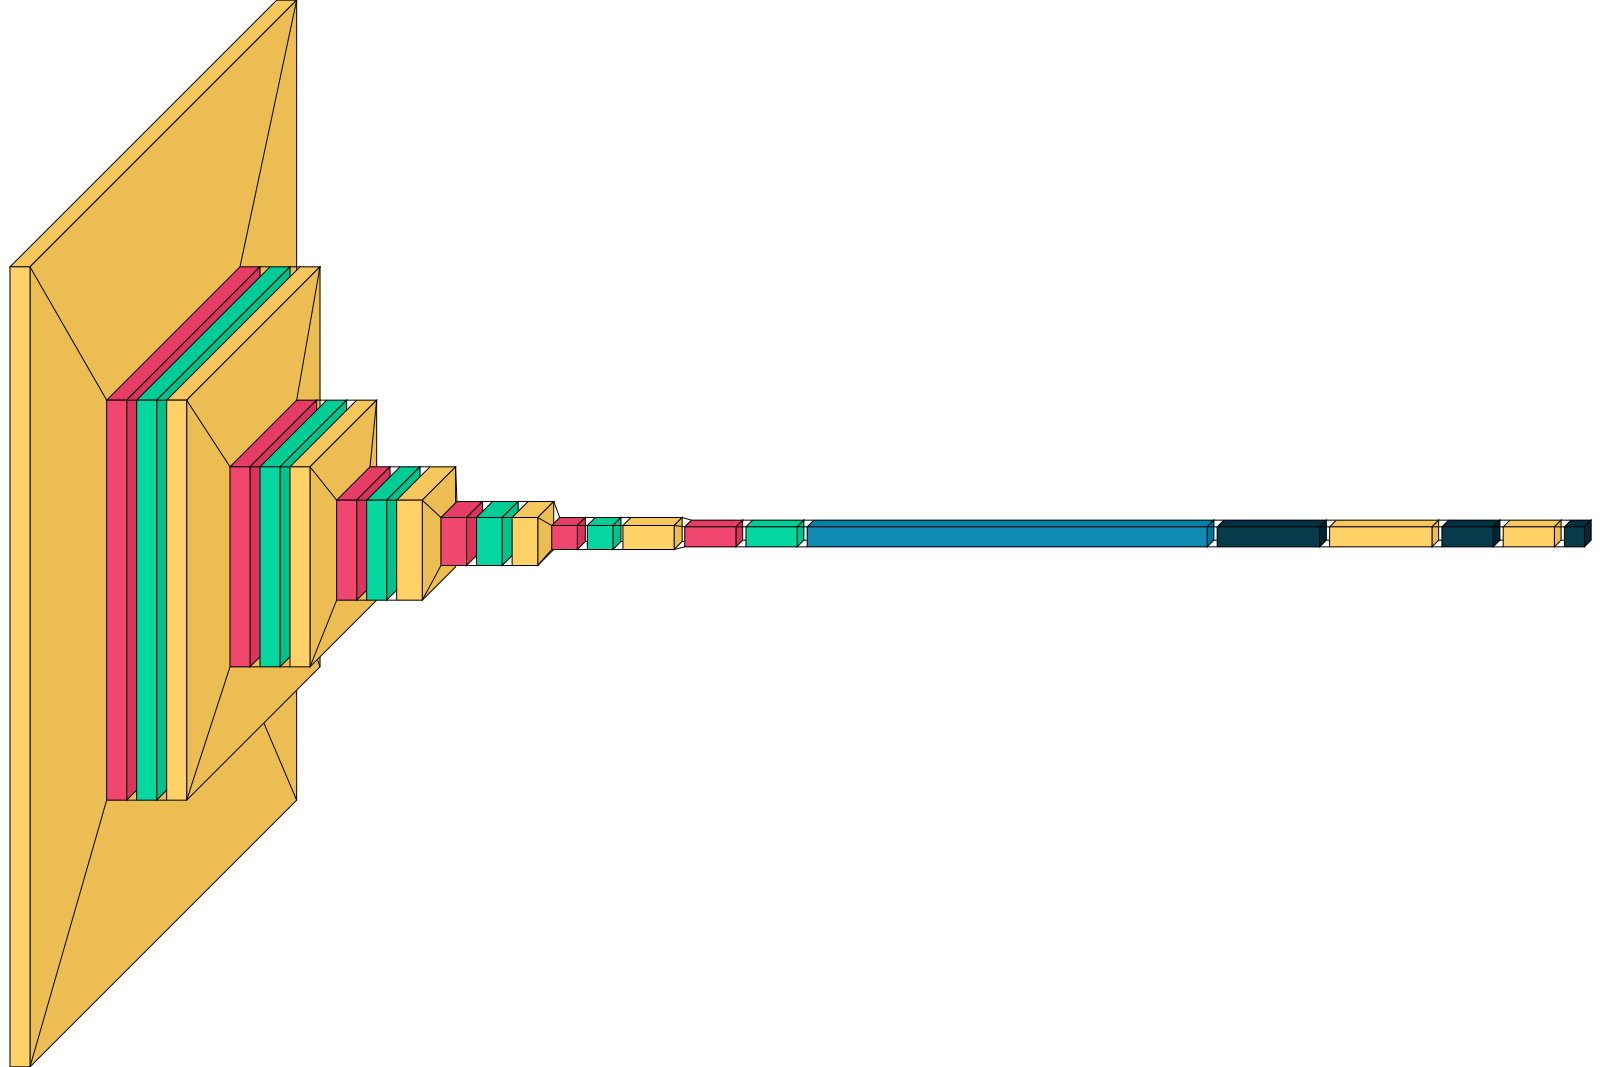

In [168]:
#Model architecture
print('Model architecture :')
visualkeras.layered_view(model)

In [54]:
#Model compilation
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

## 6.Training and Evaluation

In [55]:
#Setting the number of epochs
epochs = 50 
batch_size = 64

In [56]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs,
                                validation_data = (X_val,y_val))

Epoch 1/50
36/36 [==============================] - 8s 191ms/step - loss: 1.0064 - accuracy: 0.6185 - val_loss: 1.4332 - val_accuracy: 0.1220
Epoch 2/50
36/36 [==============================] - 7s 183ms/step - loss: 0.6097 - accuracy: 0.7504 - val_loss: 1.5401 - val_accuracy: 0.1237
Epoch 3/50
36/36 [==============================] - 7s 184ms/step - loss: 0.4441 - accuracy: 0.8253 - val_loss: 1.8037 - val_accuracy: 0.1220
Epoch 4/50
36/36 [==============================] - 7s 184ms/step - loss: 0.3620 - accuracy: 0.8641 - val_loss: 1.8924 - val_accuracy: 0.1202
Epoch 5/50
36/36 [==============================] - 7s 185ms/step - loss: 0.3230 - accuracy: 0.8693 - val_loss: 2.3442 - val_accuracy: 0.2718
Epoch 6/50
36/36 [==============================] - 7s 185ms/step - loss: 0.2475 - accuracy: 0.9168 - val_loss: 2.4775 - val_accuracy: 0.3258
Epoch 7/50
36/36 [==============================] - 7s 184ms/step - loss: 0.2034 - accuracy: 0.9268 - val_loss: 2.8273 - val_accuracy: 0.2840
Epoch 

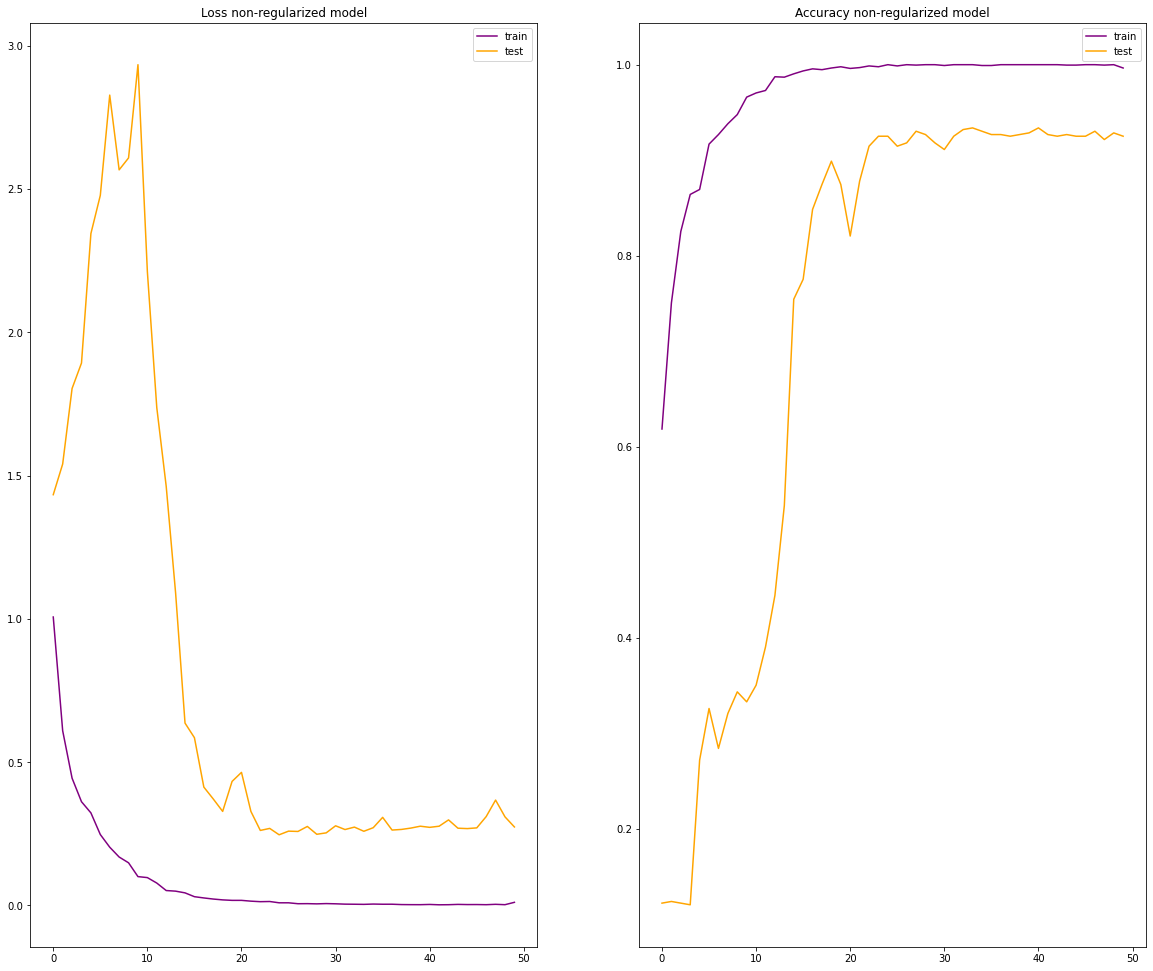

In [57]:
#accuracy and loss values during Training
plt.subplots( figsize=(20,17))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.legend(["train", "test"])
plt.title('Loss non-regularized model')

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.legend(["train", "test"])
plt.title('Accuracy non-regularized model')

plt.show()

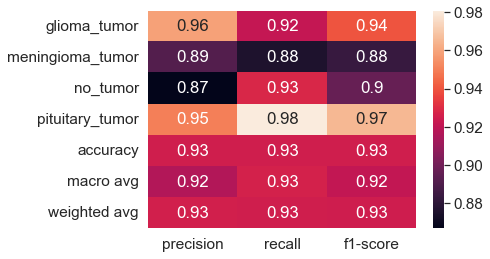

In [161]:
#Model evaluation
y_pred = model.predict(X_val)
class_pred = [np.argmax(i) for i in y_pred]
val_labels =[np.argmax(i) for i in y_val]
#report = classification_report(val_labels, class_pred)
clf_report = classification_report(val_labels, class_pred,output_dict=True,labels=[0,1,2,3],target_names=categories)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig('Model_CNN_Classification_report.png')

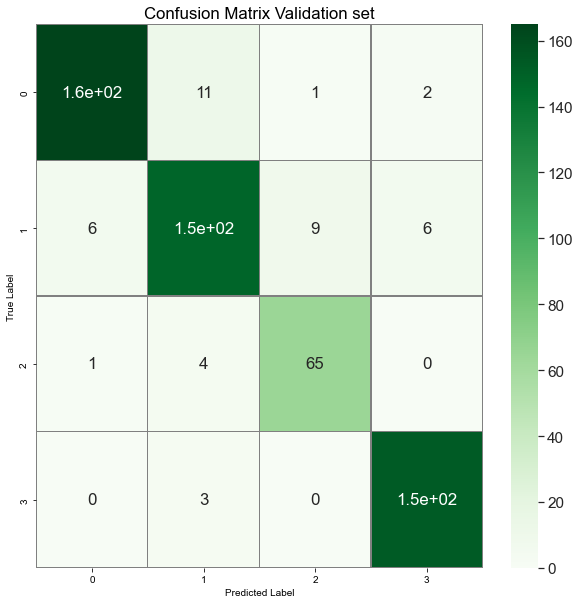

In [63]:
f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx = confusion_matrix(val_labels, class_pred)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Validation set")
plt.show()

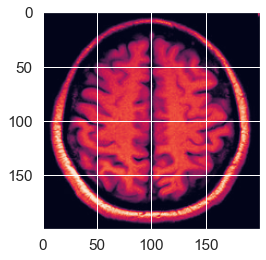

In [165]:
test_image = "tests/normal1.jpg"
#Read and prepare the image for the prediction (by resizing and applying the required parameters for testing)
img = cv2.imread(test_image,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(new_size,new_size))
img =np.array(img)
img =img/255.0
img_test =img.reshape(-1,new_size,new_size,1)
plt.imshow(img)
plt.show()

In [163]:
#Using the input image predict the result/category  
predicted_label = list(model.predict(img_test))
predicted_label = [np.argmax(i) for i in predicted_label]

print("Predicted image reesult:",categories[predicted_label[0]])

Predicted image reesult: no_tumor


In [164]:
#Save the model
model.save('Brain_cancer.h5')